# Learning Neural Network

## Loss Function

### 1. Mean Square Error

$$E=\frac{1}{2}\sum_k (y_k - t_k)^2$$

In [1]:
import numpy as np

In [2]:
#손글씨 예, 모델이 '2'일 확률이 높다고 추청(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] #모델의 예측 값
true = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답레이블, 2

In [3]:
#정답 (t) 와 예측값 (y) 의 오차를 MSE로 계산
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

In [4]:
#모델의 출력도 2이고, 정답도 2인 경우 손실 함수가 작다!
#우리는 손실함수가 작아지도록 학습하는게 목표 ~ 
mean_squared_error(np.array(y), np.array(true))

0.09750000000000003

In [5]:
#손글씨 예, 모델이 '7'일 확률이 높다고 추청(0.6)
#정답은 2이나, 모델이 틀린 경우
#위의 손실함수 값보다 큰 0.5675의 값이 계산, 즉 위의 MSE 값이 더 작으므로 정답에 가깝다고 판단 가능
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
true = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] #정답은 2
mean_squared_error(np.array(y), np.array(true))

0.5975

### 2. Cross Entropy Error

$$E=-\sum_k t_k \log(y_k)$$

In [6]:
def cross_entropy_error(y, t): #y, 와 t 는 넘파이 배열
    delta = 1e-7
#np.log()함수에 0을 입력하면 마이너스 무한대로 발산하여, 계산이 불가하므로 아주 작인 delta 값을 더하여줌
# 마이너스 무한대( -inf)가 발생하지 않게 하기 위해
    return -np.sum(t * np.log(y + delta))

In [7]:
#정답 (t) 와 예측값 (y) 의 오차를 CEE로 계산
#정답은 2
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] #신경망의 결과 2 
true = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] #정답 레이블, 2
cross_entropy_error(np.array(y), np.array(true))

0.510825457099338

In [8]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] # 신경망의 결과 7
cross_entropy_error(np.array(y), np.array(true))

2.302584092994546

## Mini Batch

$$E=\frac{1}{N}\sum_n \sum_k t_nk \log{y_nk}$$

In [2]:
import sys, os
sys.path.append("./dataset")
import numpy as np
import pickle
from mnist import load_mnist
import matplotlib.pylab as plt

In [3]:
#원-핫 인코딩을 지정하여 정답만 1이고 나머지는 0인 배열로 불러옴
(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)
print(x_train.shape) #train data 6000개, 784 차원
print(t_train.shape) # 10차원

(60000, 784)
(60000, 10)


In [9]:
train_size = x_train.shape[0]
batch_size = 10
#무작위로 뽑는 함수, train size인 60000개 중 배치 사이즈 만큼 렌덤하게 뽑는다.
#numpy의 random.choice를 통해 random으로 접근할 인덱스 생성
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [10]:
np.random.choice(60000, 10)

array([56611, 32579, 54670, 51110, 51422, 19009, 48900, 46280, 13670,
       28738])

In [17]:
x_train.shape

(60000, 784)

In [19]:
x_test.shape

(10000, 784)

In [21]:
t_train.shape

(60000, 10)

In [26]:
t_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Implementation Cross Entropy Error
데이터 하나에 대한 오차와, 배치로 묶여 있는 경우 모두 처리할 수 있도록 구현 

1. one hot encoding 용

In [11]:
def cross_entropy_error_one_hot(y, t):
#y가 1차원인 경우(데이터 하나당 오차를 구하는 경우) reshape 함수를 통해 데이터 형상을 바꿔줌 
    if y.ndim == 1: 
        t = t.reshape(1, t.size) # 정답 레이블
        y = y.reshape(1, y.size) #신경망의 출력
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size #위에서 구현한 교차 엔트로피 식에 배치 크기만큼 나눠줌

2. label 용(2나 7등의 숫자 레이블인 경우)

In [14]:
def cross_entropy_error_label(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
#np.arange(batch_size)는 0 부터 batch_size -1 까지 배열 생성 
#batch_size가 5일 경우, np.arange(batch_size)는 [0,1,2,3,4]라는 배열 생성 
#이때 t(정답 레이블)에는 [2,7,0,9,4]와 같이 저장되어 있음
#(y[np.arange(batch_size), t]는 [y[0,2], y[1,7], y[2,0], y[3,9], y[4,4]]인 배열 출력 


## Numerical Differential

### Differential

$$\frac{df(x)}{dx} = \lim_{h \to 0}{\frac{f(x+h)-f(x)}{h}}$$

In [27]:
def numerical_differential(f, x):
    h = 10e-50 #h가 작은 값으로 간다는 것을 의미, 0.000....1(0이 50개)
    return (f(x + h) - f(x)) / h

In [28]:
#파이썬의 반올림 오차 예
# 아주 작은 값(소수점 8자리 이하)가 생략되어 최종 계산에 오차가 발생 가능
np.float32(1e-50)

0.0

- h값이 작으면 반올림 오차 문제 발생 -> $h = 10^{-4}$이 좋은 결과를 낸다고 알려짐

- $(x + h)$와 $x$ 사이의 기울기와 $x$의 접선의 기울기가 달라 현재 계산 방식에 오차 존재
    - $(x+h)$와 $(x-h)$의 차이를 $2h$로 나눠서 해결


$$h = 0.0001$$
$$\frac{f(x+h)-f(x-h)}{2h}$$

In [29]:
def numerical_differential(f, x):
    h = 1e-4
    return (f(x + h) - f(x-h)) / (2*h)

### Example of Numerical Differential

$$y = 0.01x^2 + 0.1x$$

In [30]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

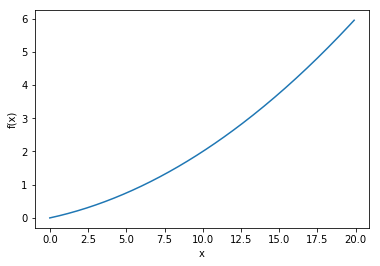

In [31]:
x = np.arange(0.0, 20.0, 0.1) #0에서 20까지 0.1 간격의 배열 생성
y = function_1(x)
# plt.figure(figsize = (15, 10)) #그래프 크기 조절
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [32]:
numerical_differential(function_1, 5)

0.1999999999990898

In [33]:
numerical_differential(function_1, 10)

0.2999999999986347

## Partial Derivative

$$f(x_0, x_1) = x_0^2+x_1^2$$

In [36]:
def function_2(x):
    return x[0]**2 + x[1]**2

$x_0 =3, x_1 =4$일 때, $x_0$에 대한 편미분 $\frac{\partial{f}}{\partial{x_0}}$를 구하라.

In [37]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [38]:
numerical_differential(function_tmp1, 3.0)

6.00000000000378

$x_0 =3, x_1 =4$일 때, $x_1$에 대한 편미분 $\frac{\partial{f}}{\partial{x_1}}$를 구하라.

In [39]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [40]:
numerical_differential(function_tmp2, 4.0)

7.999999999999119

## Gradient

In [41]:
def numerical_gradient(f, x):
    h = 1e-4 #0.0001
    grad = np.zeros_like(x) # x와 형상이 같고 모든 원소가 0인 배열 출력
    
    for index in range(x.size):
        tmp_val = x[index]
        x[index] = tmp_val + h #f(x+h) 계산
        fxh1 = f(x)
        
        x[index]= tmp_val - h #f(x-h) 계산
        fxh2 = f(x)
        
        grad[index] = (fxh1 - fxh2) / (2*h)
        x[index] = tmp_val # 값 복원
        
    return grad

In [42]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [43]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [44]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

### Gradient Method

$$x_0 = x_0 -\eta \frac{\partial f}{\partial x_0}$$

$$x_1 = x_1 -\eta \frac{\partial f}{\partial x_1}$$

In [45]:
#f=최적화하려는 함수, init_x= 초기 값, lr=0.01 learning rate, step_num = 100 반복횟수
def gradient_descent(f, init_x, lr=0.01, step_num = 100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f, x) #기울기 구하기
        x -= lr * grad # 기울기 * learning rate
    return x, np.array(x_history)

경사법으로 $f(x_0 , x_1) = x_0^2 + x_1^2$의 최솟값을 구하라

In [46]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [49]:
init_x = np.array([-3.0, 4.0]) # 초깃 값을 -3.0, 4.0으로 설정 한 후 최솟값 탐색
lr = 0.1
step_num = 100
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)
print(x) #결과가 거의 (0.0)에 가까운 값을 찾음 
# print(x_history)

[-6.11110793e-10  8.14814391e-10]


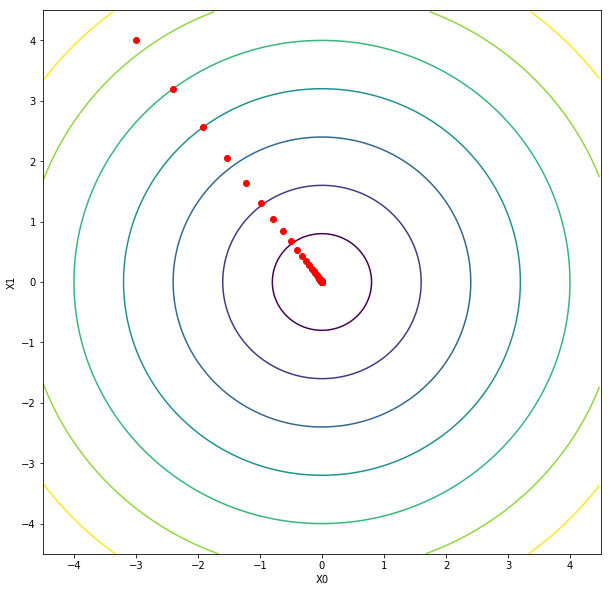

In [50]:
#경사법 갱신과정 그림으로 나타내는 코드 
import matplotlib.mlab as mlab
x = np.arange(-4.5, 4.5, 0.025)
y = np.arange(-4.5, 4.5, 0.025)
X, Y = np.meshgrid(x, y)
Z = np.sqrt(X**2 + Y**2 )
plt.figure(figsize = (10, 10))
CS = plt.contour(X, Y, Z)
plt.plot(x_history[:,0], x_history[:,1], 'or')
plt.xlim(-4.5, 4.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [51]:
#learning rate가 큰 예
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x = init_x, lr = 10.0, step_num = 100)
print(x)

[-2.58983747e+13 -1.29524862e+12]


In [52]:
#learning rate가 작은 예
#가중치가 갱신되지 않음 
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x = init_x, lr = 1e-10, step_num = 100)
print(x)

[-2.99999994  3.99999992]


### Gradient of Neural Netowrk

$$\mathbf{W}=\begin{pmatrix} w_{11} & w_{21} & w_{31} \\ w_{12} & w_{22} & w_{32} \end{pmatrix} $$

$$\frac{\partial{L}}{\mathbf{\partial{W}}}=\begin{pmatrix} \frac{\partial{L}}{\partial{w_{11}}} & \frac{\partial{L}}{\partial{w_{21}}} &\frac{\partial{L}}{\partial{w_{31}}} \\ \frac{\partial{L}}{\partial{w_{12}}} & \frac{\partial{L}}{\partial{w_{22}}} &\frac{\partial{L}}{\partial{w_{32}}} \end{pmatrix} $$

In [62]:
import sys, os
import numpy as np

In [63]:
def softmax(matrix):
    maximum_of_matrix = np.max(matrix)
    difference_from_maximum = matrix - maximum_of_matrix
    exponential_of_difference = np.exp(difference_from_maximum)
    sum_of_exponential = np.sum(exponential_of_difference)
    y = exponential_of_difference / sum_of_exponential
    return y

def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))
def numerical_gradient3(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for index_row in range(x.shape[0]):
        for index_column in range(x.shape[1]):
            tmp_val = x[index_row, index_column]
            x[index_row, index_column] = tmp_val + h
            fxh1 = f(x)
 
            x[index_row, index_column]= tmp_val - h
            fxh2 = f(x)
 
            grad[index_row, index_column] = (fxh1 - fxh2) / (2*h)
            x[index_row, index_column] = tmp_val
        
    return grad

# def numerical_gradient(f, x):
#    h = 1e-4
#    grad = np.zeros_like(x)
    
#    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
#    while not it.finished: #다차원 배열에 접근할 수 있는 인덱스 생성 
#        idx = it.multi_index
#        tmp_val = x[idx]
#        x[idx] = float(tmp_val) + h
#        fxh1 = f(x) # f(x+h)
        
#        x[idx] = tmp_val - h 
#        fxh2 = f(x) # f(x-h)
#        grad[idx] = (fxh1 - fxh2) / (2*h)
        
#        x[idx] = tmp_val
#        it.iternext()   
        
#    return grad

In [64]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)# 정귭 분포

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

몇 가지 실험을 해 봅시다.

In [72]:
net = simpleNet()
print(net.W) #가중치 매개변수 확인

[[-1.79331543  0.00506083  1.77065655]
 [-0.41113228 -0.16627175 -0.24843613]]


In [73]:
x = np.array([0.6, 0.9]) #입력 데이터 
p = net.predict(x)
print(p)

[-1.44600831 -0.14660807  0.83880141]


In [74]:
np.argmax(p) #최댓값의 인덱스

2

In [75]:
t = np.array([0, 0, 1]) #정답레이블
net.loss(x, t) #CEE 사용하여 에러 값 구하기 

0.38871192270367577

In [76]:
def f(W): # 기울기 구하기 
    return net.loss(x, t)
dW = numerical_gradient3(f, net.W)
print(dW) #2*3의 2차원 배열

[[ 0.04140525  0.15183706 -0.19324231]
 [ 0.06210788  0.22775559 -0.28986346]]


In [77]:
import sys, os
sys.path.append("./dataset")
import numpy as np
import pickle
from mnist import load_mnist
import matplotlib.pylab as plt

## Two Layer Net Class를 위한 함수들

In [127]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def relu(x):
    return np.maximum(0, x)
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)
def relu_grad(x):
    grad = np.zeros(x)
    grad[x>=0] = 1
    return grad
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 
    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)        
    if t.size == y.size:
        t = t.argmax(axis=1)             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
def softmax_loss(X, t):
    y = softmax(X)
    return cross_entropy_error(y, t)

def numerical_gradient3(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    # 웨이트가 2*3 2차원이므로, 인덱스를 2개를 통해 미분 값 구함  
    for index_row in range(x.shape[0]): 
        for index_column in range(x.shape[1]):
            tmp_val = x[index_row, index_column]
            x[index_row, index_column] = tmp_val + h
            fxh1 = f(x)

            x[index_row, index_column]= tmp_val - h
            fxh2 = f(x)
            
            grad[index_row, index_column] = (fxh1 - fxh2) / (2*h)
            x[index_row, index_column] = tmp_val
        
    return grad
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished: #다차원 배열에 접근할 수 있는 인덱스 생성 
       idx = it.multi_index
       tmp_val = x[idx]
       x[idx] = float(tmp_val) + h
       fxh1 = f(x) # f(x+h)

       x[idx] = tmp_val - h 
       fxh2 = f(x) # f(x-h)
       grad[idx] = (fxh1 - fxh2) / (2*h)

       x[idx] = tmp_val
       it.iternext()   

    return grad

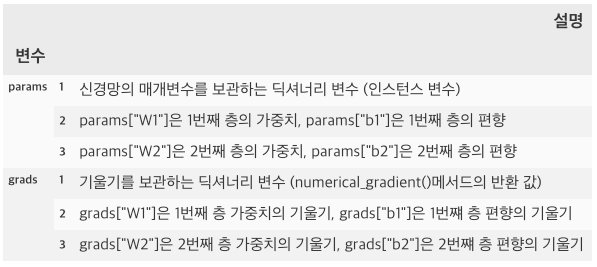

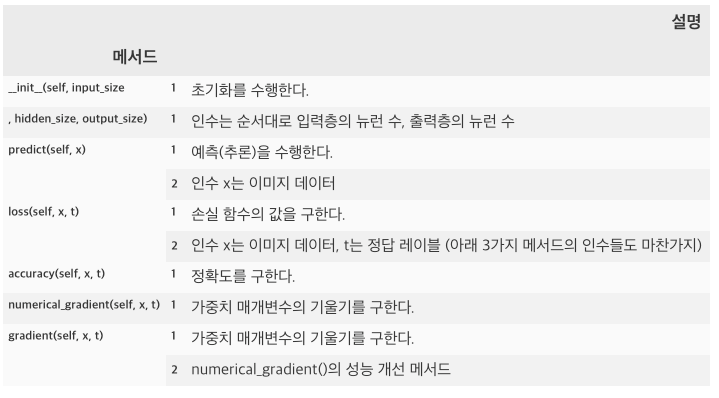

In [128]:
class TwoLayerNet:
#input_size=입력층의 뉴런 수, hidden_size=은닉층의 뉴런수, output_size출력층 뉴련수
#weight_init_std=0.01 정규분포를 따르는 난수 
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        self.count = 0

    def predict(self, x):
        #print("predict")
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
# 손실함수 계산
#Predict() 결과와 정답 레이블을 바탕으로 교차 엔트로피 사용 
    def loss(self, x, t): 
        y = self.predict(x)

        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
#새로운 함수 정의할때 def f(x):... 하지만, 간단한 함수를 사용하는 경우 람다 기법을 사용하여 편하게 구현 가능        
    def numerical_gradient4(self, x, t):
        loss_W = lambda W: self.loss(x, t) 
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads
        
    def gradient(self, x, t): # 기울기 보관
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads

In [129]:
net = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [130]:
#params 변수에 신경망에 필요한 매개변수 저장, 순방향에서 사용됨
print(net.params["W1"].shape) #1번째 층의 가중치 매개변수는 params["W1"]키에 넘파이 배열로 저장
print(net.params["b1"].shape)
print(net.params["W2"].shape)
print(net.params["b2"].shape)

(784, 50)
(50,)
(50, 10)
(10,)


In [131]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [132]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)
# 수행시간이 오래 걸림
grads = net.numerical_gradient4(x, t) # 기울기 계산

In [133]:
print(grads["W1"].shape)
print(grads["b1"].shape)
print(grads["W2"].shape)
print(grads["b2"].shape)

(784, 50)
(50,)
(50, 10)
(10,)


### Implementation Mini-batch Learning

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [ ]:
train_loss_list = []

In [ ]:
iters_num = 10000 #반복횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1 
iter_per_epoch = max(train_size / batch_size, 1)

In [ ]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [ ]:
for i in range(iters_num):
    # 미니배치 획득
    #랜덤으로 이미지 100개 와 정답 100개 추출
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 성능 개선판
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # Loss출력, 학습이 진행되면서 loss 값이 줄어드는 것을 확인 할 수 있음 
    if i % iter_per_epoch == 0:
        print("loss: " + str(loss))

In [ ]:
x = np.arange(len(train_loss_list))

plt.figure(figsize = (15, 10))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

### Validation with Test Data

In [103]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [104]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [105]:
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
iter_per_epoch = max(train_size / batch_size, 1)

In [106]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [108]:
for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 성능 개선판
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # Loss 및 Accuracy 출력
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("loss: " + str(loss) + ", train acc: " + str(train_acc) + ", test acc: " + str(test_acc))

loss: 0.5727655876956049, train acc: 0.88005, test acc: 0.8869
loss: 0.30077603652237606, train acc: 0.8991, test acc: 0.9033
loss: 0.3503103259695248, train acc: 0.9088, test acc: 0.9116
loss: 0.2473091217196984, train acc: 0.9148, test acc: 0.9167
loss: 0.24096634507065928, train acc: 0.9211666666666667, test acc: 0.9229
loss: 0.1136431132177401, train acc: 0.9252666666666667, test acc: 0.9257
loss: 0.23812367404484472, train acc: 0.9283, test acc: 0.9281
loss: 0.16342792257618288, train acc: 0.9309666666666667, test acc: 0.9299
loss: 0.26993182561310414, train acc: 0.9341833333333334, test acc: 0.9339
loss: 0.2196494325340699, train acc: 0.9371833333333334, test acc: 0.9354
loss: 0.18401981923985275, train acc: 0.9391, test acc: 0.939
loss: 0.22065255687313978, train acc: 0.9412, test acc: 0.9401
loss: 0.11912659639566346, train acc: 0.9434666666666667, test acc: 0.9422
loss: 0.18827828157891546, train acc: 0.9456666666666667, test acc: 0.9441
loss: 0.08732730194353606, train acc: 0

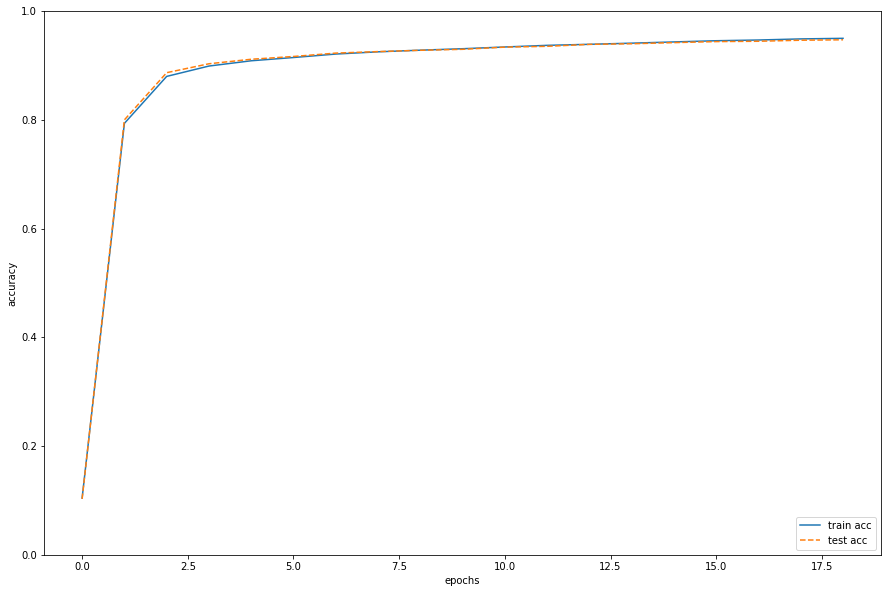

In [109]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))

plt.figure(figsize = (15, 10))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()